In [1]:
%matplotlib inline 
import requests
import pandas as pd
import json
import pickle
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt
import geopandas as gpd
#from variables import *
from pyquadkey2 import quadkey

from pyquadkey2.quadkey import TileAnchor, QuadKey
from shapely.geometry import Point, LineString, Polygon


In [2]:
quadkey.TileAnchor


<enum 'TileAnchor'>

In [3]:

#bing url: 
bing_url = f'http://dev.virtualearth.net/REST/V1/Imagery/Metadata/RoadOnDemand?output=json&include=ImageryProviders&key=AimFQCJzfM8uOBGY0Ptd6IXHcj54WUPHobETbIKqZVarDXDbTvDdd5rE99QWKAWs'
response=requests.get(bing_url)
print(response.text)

{"authenticationResultCode":"ValidCredentials","brandLogoUri":"http:\/\/dev.virtualearth.net\/Branding\/logo_powered_by.png","copyright":"Copyright © 2021 Microsoft and its suppliers. All rights reserved. This API cannot be accessed and the content and any results may not be used, reproduced or transmitted in any manner without express written permission from Microsoft Corporation.","resourceSets":[{"estimatedTotal":1,"resources":[{"__type":"ImageryMetadata:http:\/\/schemas.microsoft.com\/search\/local\/ws\/rest\/v1","imageHeight":256,"imageUrl":"http:\/\/ak.dynamic.{subdomain}.tiles.virtualearth.net\/comp\/ch\/{quadkey}?mkt=en-US&it=G,L&shading=hill&og=1419&n=z","imageUrlSubdomains":["t0","t1","t2","t3"],"imageWidth":256,"imageryProviders":[{"attribution":"© 2021 Microsoft Corporation","coverageAreas":[{"bbox":[-90,-180,90,180],"zoomMax":21,"zoomMin":1}]},{"attribution":"© 2021 TomTom","coverageAreas":[{"bbox":[-90,-180,90,180],"zoomMax":21,"zoomMin":1}]},{"attribution":"© 2021 Zenrin

#pip install pyquadkey2

Resources: 
- Description of Quadkyes https://docs.microsoft.com/en-us/bingmaps/articles/bing-maps-tile-system 
- Library to work with lat lon and QuadKeys https://github.com/CartoDB/python-quadkey 
- Methodlogy paper https://arxiv.org/ftp/arxiv/papers/2104/2104.07761.pdf 
- OSM page for getting the tiles based on coordinate system https://wiki.openstreetmap.org/wiki/Slippy_map_tilenames#Lon..2Flat._to_tile_numbers_2
- Python library documentation 
https://docs.muetsch.io/pyquadkey2/ 


QuadKeys: 
- the length of the quad key is the level of detail it refres to (longest = more granular level) 
- parent -child relationship: tile 2 is the perant of tile 20 

Our data is in zoom level 14, which is 9.555 meters/pixel resolution 

plan: 
- take list of lat lon from FB data
- convert to quadkey 
- get list of 4 coordinates
- transform to polygons 

#from pyquadkey2 import quadkey

* 2.4Km2 is aproximatly 5.76 km2 area 
* looking into the QuadKeys it seems as though the nearest tile size is 5982842.156102487 Square meteres
* this measurment is closest to tiles sized 2.447 KM (length and width)
* the coordinate we are getting is the corner of each tile 
* Coordinate system is WGS 84 datum. 

In [5]:
qk = QuadKey('20202020220202')
print (qk.area())
print (qk.nearby(2))
print (qk.to_geo())


5982842.156102487
['20202020220203', '20202020220220', '20202020220221', '20202020220032', '20202020220202', '20202020220223', '20202020220200', '20202020220212', '20202020220022', '20202020220210', '20202020220232', '20202020220230', '20202020220023', '20202020220222', '20202020220201']
(-51.467697, -180.0)


In [6]:
#print (qk.bbox('20202020220202'))
#print(quadkey.lonlat2quadint(-73.969558715820312, 40.757678985595703)
from pyquadkey2.quadkey import QuadKey
qks = [QuadKey('032'), QuadKey('011')]
QuadKey.bbox(qks)

[011, 013, 031, 033, 010, 012, 030, 032]

In [7]:
#pip install quadkey

In [8]:
from pyquadkey2.quadkey import QuadKey

In [9]:
# takes lat, lon and returns the QuadLey for given point and tile Zoom level 
qk1 = quadkey.from_geo((-51.467699, -180.0), 14)
print (qk1)

20202020220202


In [10]:
qk1.to_geo(TileAnchor.ANCHOR_NW)
#self, anchor: TileAnchor = TileAnchor.ANCHOR_NW

(-51.467697, -180.0)

In [11]:
# compute for points 

sw = qk1.to_geo(anchor=TileAnchor.ANCHOR_SW)
ne = qk1.to_geo(anchor=TileAnchor.ANCHOR_NE)
se = qk.to_geo(anchor=TileAnchor.ANCHOR_SE)
nw = qk.to_geo(anchor=TileAnchor.ANCHOR_NW)

In [12]:



print(nw)
print(sw)
print(se)
print(ne)

(-51.467697, -180.0)
(-51.481383, -180.0)
(-51.481383, -179.978027)
(-51.467697, -179.978027)


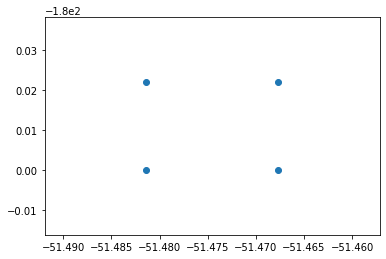

In [13]:
x = (-51.467697,-51.481383,-51.481383,-51.467697)
y = (-180.0,-180.0,-179.978027,-179.978027)

plt.scatter(x,y)

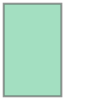

In [14]:
poly = Polygon([nw,sw,se,ne])
poly

In [15]:
print (poly)

POLYGON ((-51.467697 -180, -51.481383 -180, -51.481383 -179.978027, -51.467697 -179.978027, -51.467697 -180))


# Generalize with FB data

In [16]:
fb_windex = pd.read_csv('dza_relative_wealth_index.csv')
fb_windex 

,latitude,longitude,rwi,error
0,34.985003,4.493408,-0.472,0.283
1,36.800488,4.031982,0.542,0.422
2,35.505400,5.064697,-0.354,0.320
3,36.624345,3.284912,0.848,0.464
4,34.551811,6.097412,-0.528,0.333
...,...,...,...,...
35848,36.606708,5.767822,-0.347,0.316
35849,36.536122,4.669189,-0.012,0.372
35850,22.928041,5.240479,-0.259,0.276
35851,34.551811,3.109131,-0.539,0.287


In [18]:
#columns to list 
lat = fb_windex['latitude'].tolist()
lon = fb_windex['longitude'].tolist()
Quadkeys= []

# take the point lat and lon and return quadkey
for x, y in zip(lat, lon):
    qkFB = quadkey.from_geo((y,x), 14)
    Quadkeys.append(qkFB)

    


In [19]:
# use quadkeys to generate four point for each tile 

SW=[]
NE=[]
SE=[]
NW=[]

for i in Quadkeys:
    #south west point
    sw = i.to_geo(anchor=TileAnchor.ANCHOR_SW)
    SW.append(sw) 
    #north west point
    ne = i.to_geo(anchor=TileAnchor.ANCHOR_NE)
    NE.append(ne) 
    #south east point 
    se = i.to_geo(anchor=TileAnchor.ANCHOR_SE)
    SE.append(se)
    #north west point 
    nw = i.to_geo(anchor=TileAnchor.ANCHOR_NW)
    NW.append(nw)
    
    
    

In [20]:
tiledata=[]
for sw,ne,se,nw in zip(SW, NE,SE,NW):
    poly = Polygon([nw,sw,se,ne])
    tiledata.append(poly)
    

In [21]:
print (tiledata[2])

POLYGON ((5.069058 35.48584, 5.047171 35.48584, 5.047171 35.507813, 5.069058 35.507813, 5.069058 35.48584))


In [22]:
crs=("epsg:4326")
gdf = gpd.GeoDataFrame(geometry=tiledata, crs=crs)
# gdf = geopandas.GeoDataFrame(geometry=outmulti, crs="EPSG:4326") # if you have coordinates in degrees
#gdf.to_file("my_file.shp")

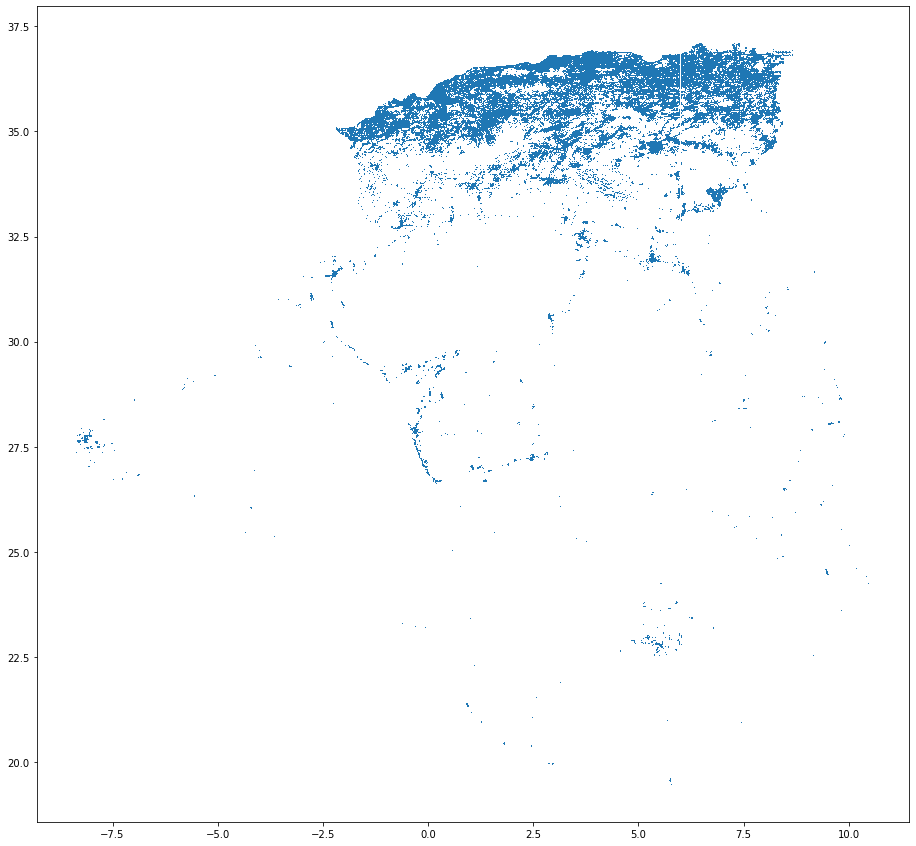

In [23]:
gdf.plot(figsize=(20,15))

In [24]:
aoi = gpd.read_file('aoi2')

In [25]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
algiers_clipped = gpd.clip(gdf,aoi)

#base = gdf.plot(color='blue',figsize=(20, 15))

#gdf_windex.plot(ax=base,column='rwi',cmap='jet',figsize=(20, 15), alpha = 0.2)

/opt/anaconda3/lib/python3.7/site-packages/geopandas/geoseries.py:358: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


In [27]:
aoi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

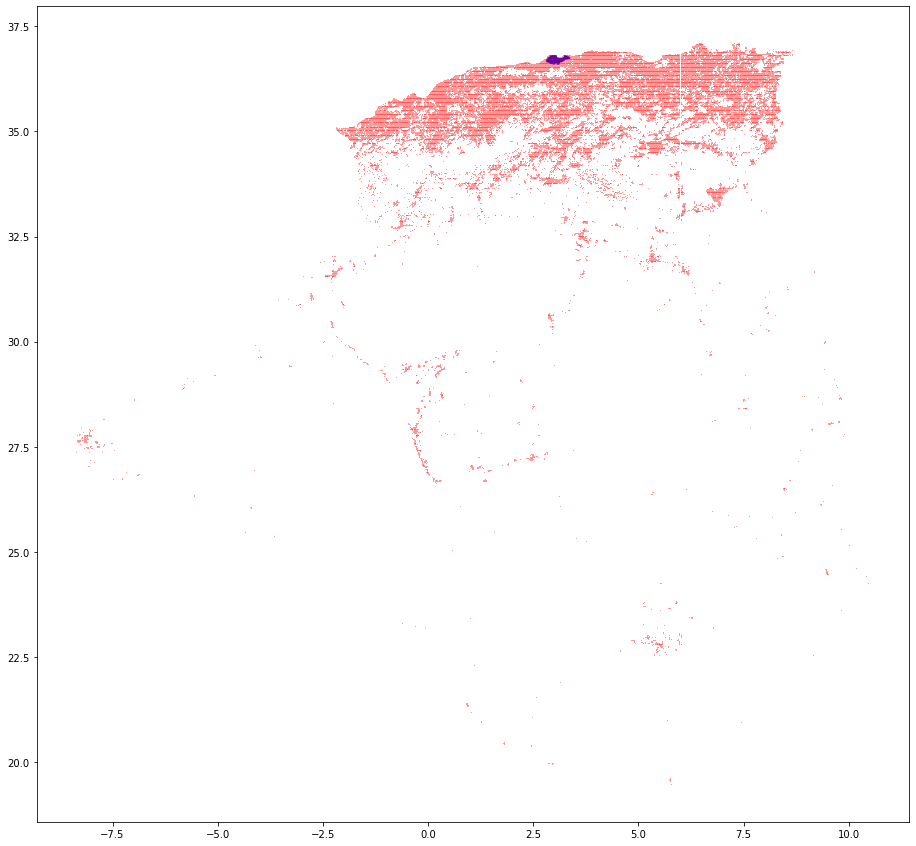

In [29]:
base = aoi.plot(color='blue',figsize=(20, 15))

gdf.plot(ax=base,color='red',figsize=(20, 15), alpha = 0.4)

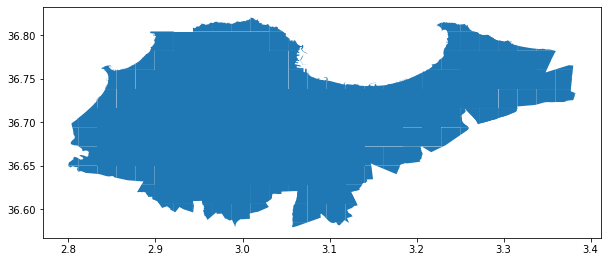

In [30]:
algiers_clipped.plot(figsize=(10,12))

In [31]:

gdf_windex = gpd.GeoDataFrame(
    fb_windex, geometry=gpd.points_from_xy(fb_windex.longitude, fb_windex.latitude), crs ="WGS 84")

fb_clipped1 = gpd.clip(gdf_windex,aoi)

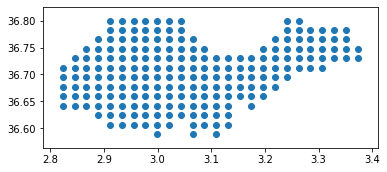

In [32]:
fb_clipped1.plot()

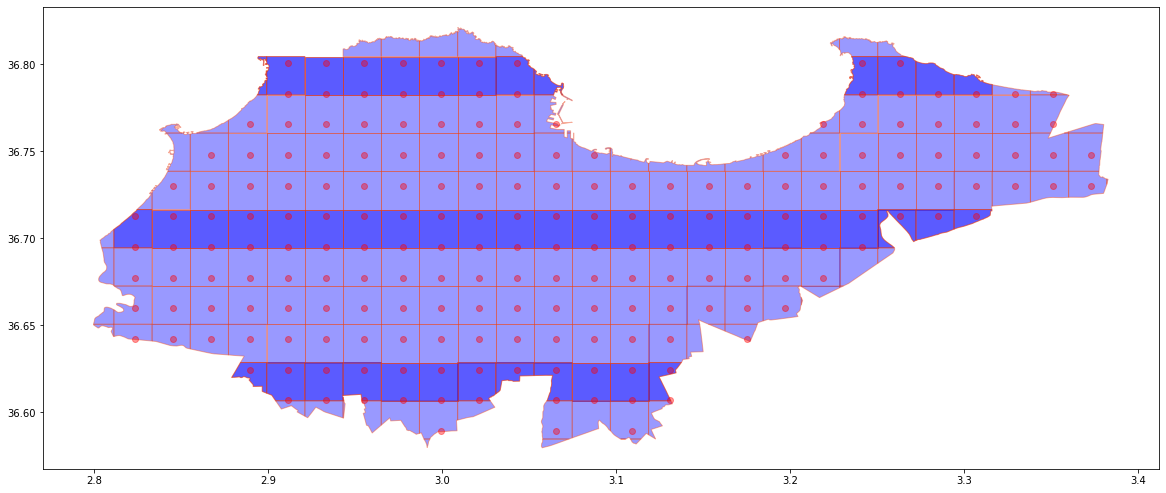

In [33]:
base = algiers_clipped.plot(color='blue',figsize=(20, 15),edgecolor='orangered',alpha = 0.4)

fb_clipped1.plot(ax=base,color='red',figsize=(20, 15), alpha = 0.4)

In [34]:
joinned = gpd.sjoin(fb_clipped1, gdf, how="right", op="within")

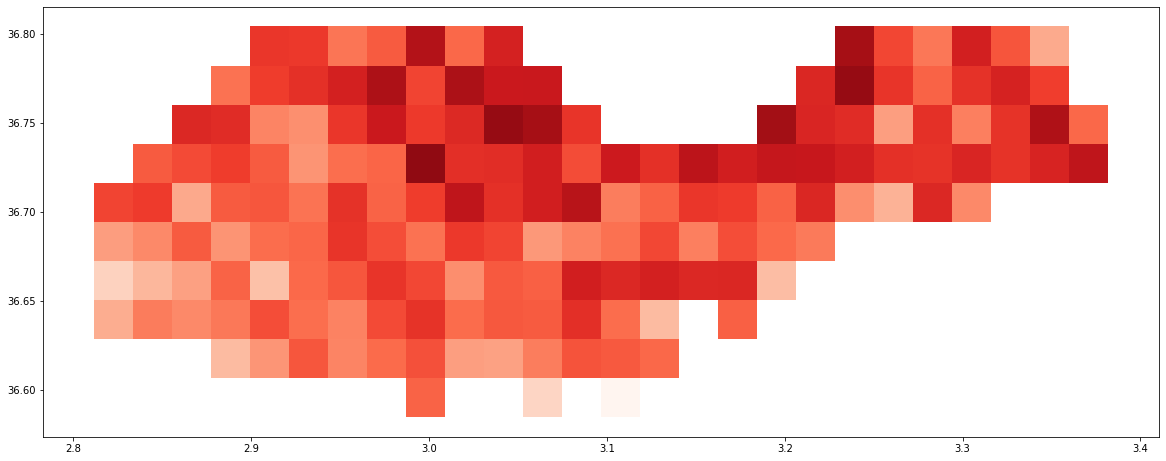

In [35]:
joinned.plot(column='rwi',cmap='Reds',figsize=(20, 15))